In [1]:
cts_ctl = read.table("../data/processed/cts_ctl.csv", sep = ",", header = T)
cts_tst = read.table("../data/processed/cts_tst.csv", sep = ",", header = T)
cts = read.table("../data/processed/cts_order.csv", sep = ",", header = T)

In [2]:
cts = cts[,!(names(cts) %in% c("target_id"))]
cts

SRR7949817,SRR7949816,SRR7949815,SRR7949814,SRR7949821,SRR7949819,SRR7949820,SRR7949823,SRR7949824,SRR7949826,⋯,SRR7949810,SRR7949809,SRR7949804,SRR7949841,SRR7949842,SRR7949805,SRR7949802,SRR7949803,SRR7949812,SRR7949813
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1243,1952,2319,1737,1961,2359,2226,1234,2108,1924,⋯,1441,757,1153,3305,2297,988,3251,946,1619,981
0,0,1,0,1,0,0,0,0,1,⋯,0,0,0,1,2,0,1,0,2,0
215,366,270,127,313,223,403,194,236,183,⋯,362,255,192,352,745,326,338,122,208,122
71,117,139,131,122,79,149,71,124,158,⋯,343,80,182,201,205,157,251,70,135,256
774,990,1080,762,916,760,710,449,893,944,⋯,2006,445,678,1486,1576,818,1118,508,698,1008
285,367,368,190,334,357,304,164,347,292,⋯,533,216,369,561,765,328,360,114,246,123
36,37,9,0,0,38,26,0,0,38,⋯,113,17,32,0,17,38,41,38,0,45
149,141,206,108,256,346,301,156,372,267,⋯,256,197,271,397,501,0,309,133,155,93
4,0,7,17,0,3,11,0,20,21,⋯,37,9,0,52,30,16,34,0,7,10


In [3]:
t.test(cts[1,1:20], cts[1,21:50])


	Welch Two Sample t-test

data:  cts[1, 1:20] and cts[1, 21:50]
t = 2.33, df = 46.972, p-value = 0.02416
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  61.50455 839.26212
sample estimates:
mean of x mean of y 
 2007.050  1556.667 


In [4]:
y <- t.test(cts[1,1:20], cts[1,21:50])

dim(cts)

[1] 162499     50

In [5]:
ttestCts <- function(df, grp1, grp2) {
  x = df[grp1]
  y = df[grp2]
  x = as.numeric(x)
  y = as.numeric(y)  
  results = t.test(x, y)
  results$p.value
}
rawpvalue = apply(cts, 1, ttestCts, grp1 = c(1:20), grp2 = c(21:50))

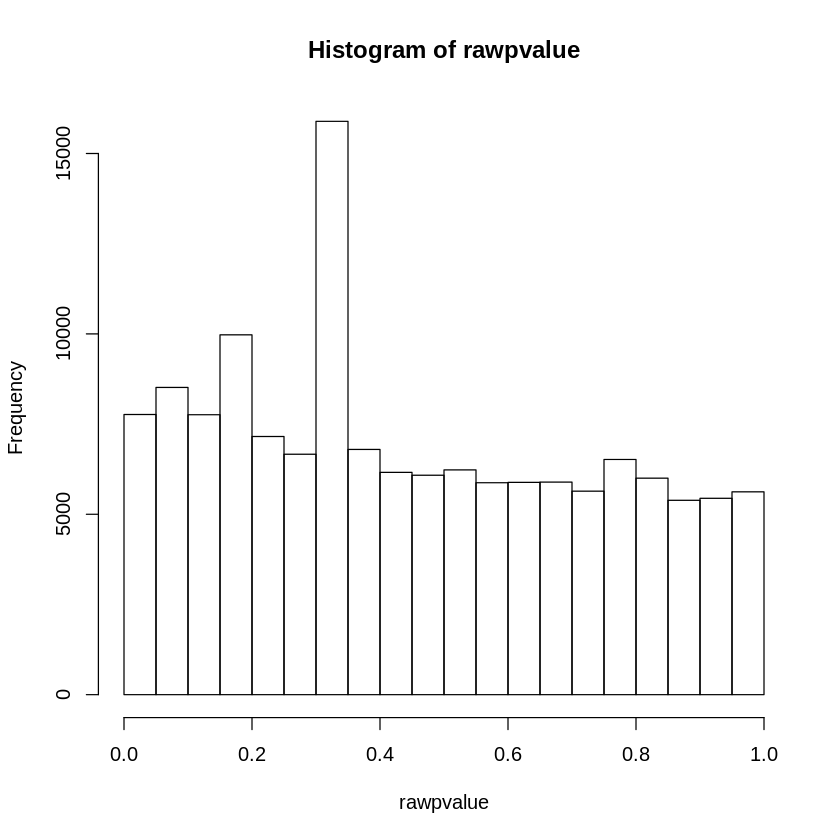

In [6]:
hist(rawpvalue)

Log2 the data, calculate the mean for each gene per group. Then calculate the fold change between the groups (control vs. opioid abusers). hint: log2(ratio)

In [7]:
##transform our data into log2 base.
cts = log2(cts)

#calculate the mean of each gene per control group
control = apply(cts[,1:6], 1, mean)

#calcuate the mean of each gene per test group
test = apply(cts[, 7:11], 1, mean) 

#confirming that we have a vector of numbers
class(control) 

[1] "numeric"

In [8]:
#confirming we have a vector of numbers
class(test)

[1] "numeric"

In [9]:
#because our data is already log2 transformed, we can take the difference between the means.  And this is our log2 Fold Change or log2 Ratio == log2(control / test)
foldchange <- control - test 

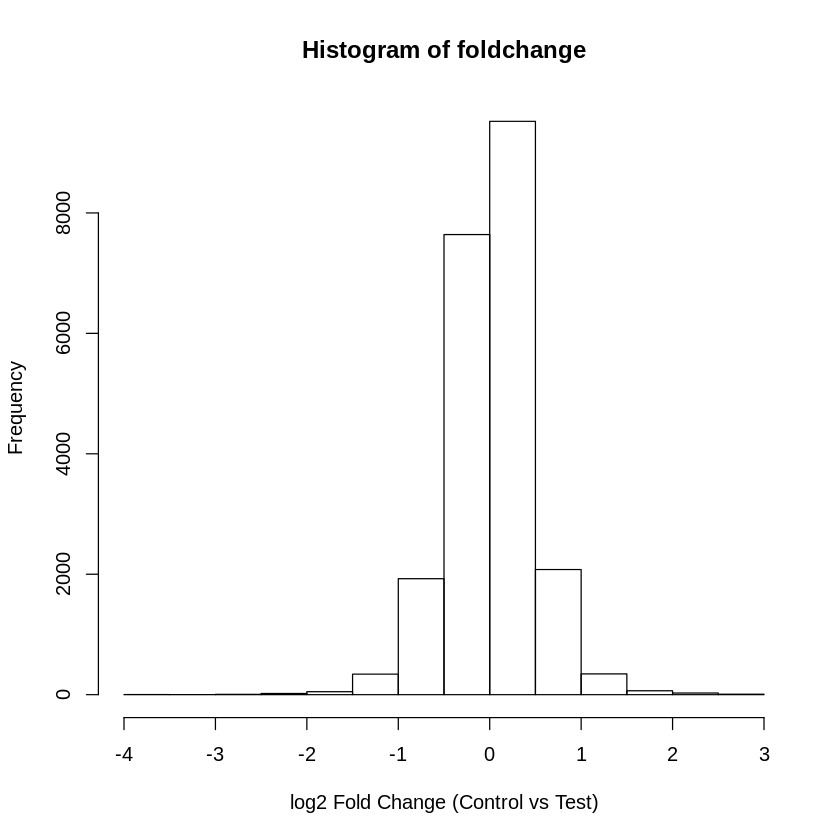

In [10]:
hist(foldchange, xlab = "log2 Fold Change (Control vs Test)")

Warning message:
“Removed 129016 rows containing missing values (geom_point).”


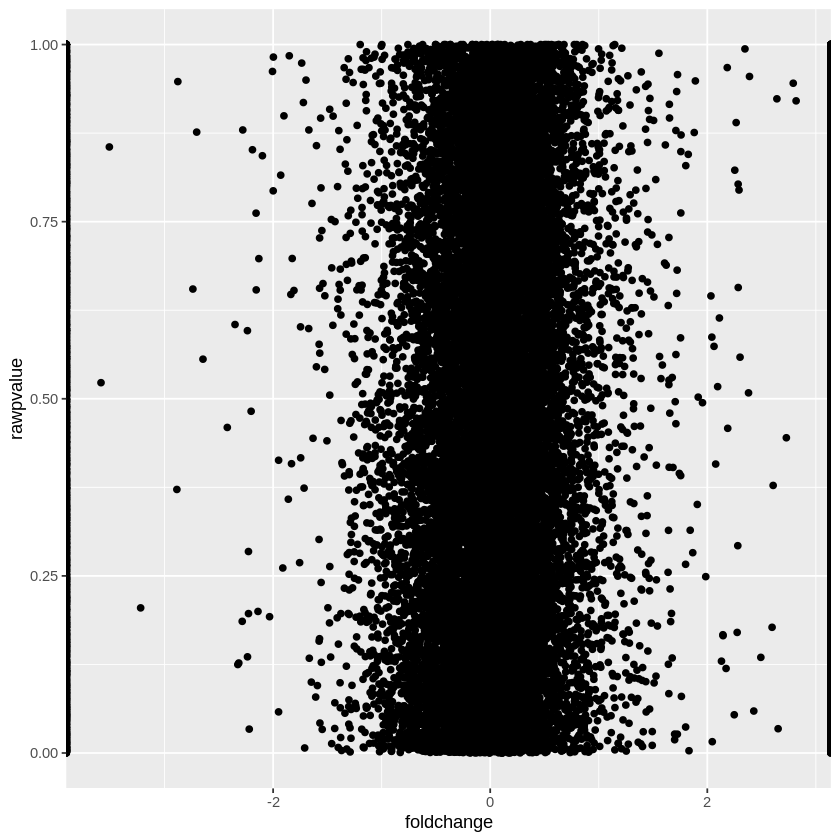

In [12]:
results = cbind(foldchange, rawpvalue)
results = as.data.frame(results)
results$probename <- rownames(results)

library(ggplot2)
volcano = ggplot(data = results, aes(x = foldchange, y = -1*log10(rawpvalue)))
volcano + geom_point()
